In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
training_data_folder_path = 'drive/MyDrive/Dataset/training_FERET'
test_data_folder_path = 'drive/MyDrive/Dataset/test_FERET'

Importing All the Necessary Packages

In [18]:
#import the necessary packages
import numpy as np
from sklearn.svm import LinearSVC
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import cv2
import os

hLBPH Using skimage

In [19]:
# import the necessary packages for getting LBP images
from skimage import feature
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="default")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist, lbp
desc = LocalBinaryPatterns(8, 1)

hLBPH Function with calculation

In [20]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values 
            img1_vector = np.delete(img1_vector,4)  
            digit = np.where(img1_vector)[0]         
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                    # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

Reading and storing training data

In [21]:
def data(training_data_folder_path) :
  dirs = os.listdir(training_data_folder_path)

  faces = []
  labels = []
  hist = []
  lbp_images = []

  for i in dirs :
    x = training_data_folder_path + "/" + i
    label = int(i.lstrip('0'))
    #print(label)
    #labels.append(label)
    for j in os.listdir(x) :
      path = x + "/" + j
      img = cv2.imread(path)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          #Converting our input image to grayscale
      lbp_image = Binarypattern(gray)
      hists = lbp_image.flatten()                           # for histogram using the vector form of image pixels

      faces.append(gray)
      labels.append(label)
      lbp_images.append(lbp_image)
      hist.append(hists)


  return faces, labels, lbp_images, hist

In [22]:
faces, labels, lbp_images, hist = data(training_data_folder_path)

Getting the histograms and LBP Images from our LocalBinaryPatterns class

In [23]:
base_hist = []
base_lbp_image= []
for i in range(0,len(faces)):
  base_hists, base_image = desc.describe(faces[i])
  base_hist.append(base_hists)
  base_lbp_image.append(base_image)

Plotting the results from both approaches

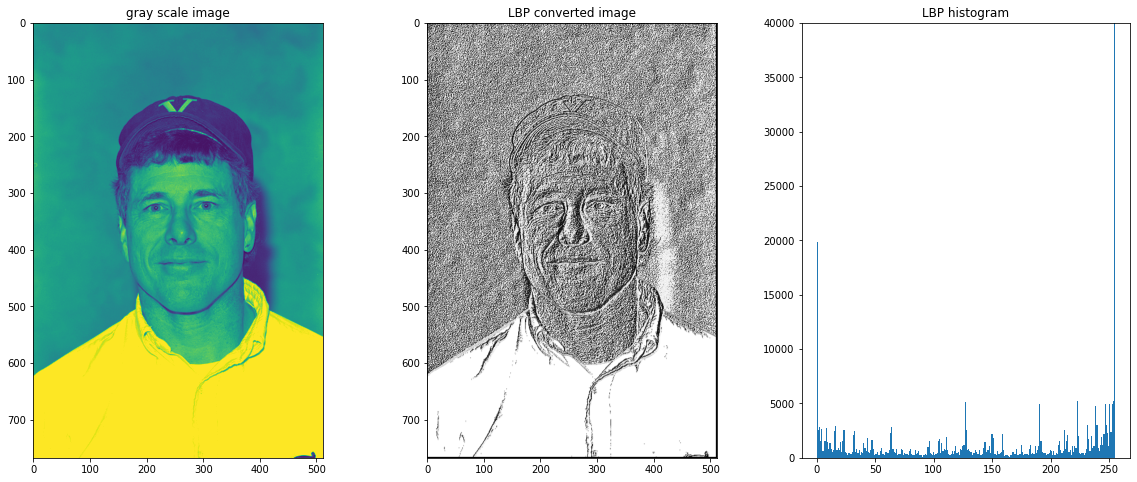

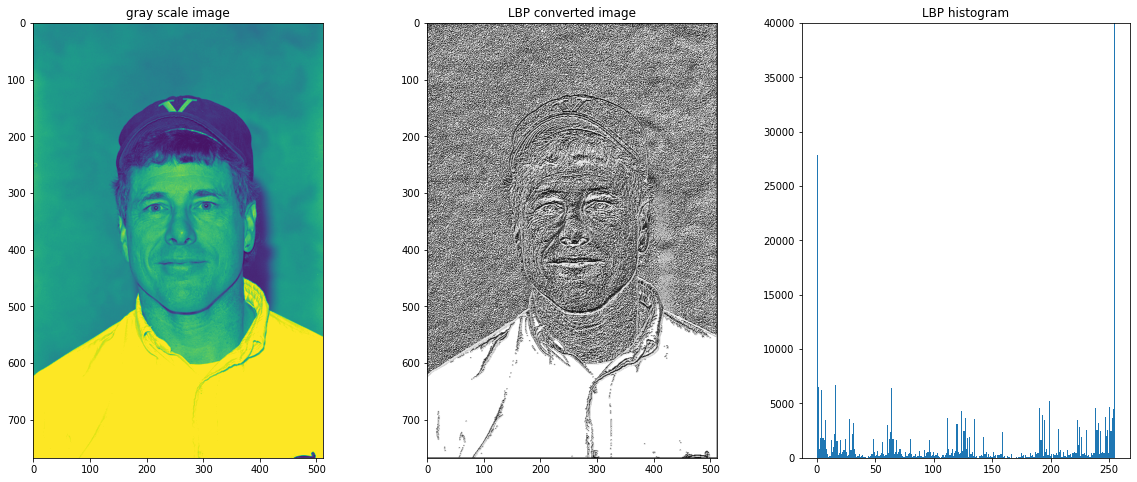

In [24]:
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram 
ax  = fig.add_subplot(1,3,1)
ax.imshow(faces[0])
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(lbp_images[0],cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(hist[0],bins=2**8)       
ax.set_ylim(0,40000)
lbp = lbp[:-1]
ax.set_title("LBP histogram")
plt.show()

fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram 
ax  = fig.add_subplot(1,3,1)
ax.imshow(faces[0])
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(base_lbp_image[0],cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(base_lbp_image[0].ravel(),bins=2**8)       
ax.set_ylim(0,40000)
lbp = lbp[:-1]
ax.set_title("LBP histogram")
plt.show()

In [25]:
def data_test(test_data_folder_path) :
  dirs = os.listdir(test_data_folder_path)

  faces_test = []
  labels_test = []
  hist_test = []
  lbp_images_test = []

  for i in dirs :
    x = test_data_folder_path + "/" + i
    label = int(i.lstrip('0'))
    #print(label)
    #labels.append(label)
    for j in os.listdir(x) :
      path = x + "/" + j
      img = cv2.imread(path)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      
      lbp_image = Binarypattern(gray)
      hists = lbp_image.flatten()

      faces_test.append(gray)
      labels_test.append(label)
      hist_test.append(hists)
      lbp_images_test.append(lbp_image)


  return faces_test, labels_test, hist_test, lbp_images_test
  
faces_test, labels_test, hist_test, lbp_images_test = data_test(test_data_folder_path)

In [26]:
base_hist_test = []
base_lbp_image_test= []
for i in range(0,len(faces_test)):
  base_hists, base_image = desc.describe(faces_test[i])
  base_hist_test.append(base_hists)
  base_lbp_image_test.append(base_image)

In [27]:
model = LinearSVC(C = 100, random_state = 42) #Defining our model
model.fit(base_hist, labels)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score
prediction = model.predict(base_hist_test)
accuracy_score(labels_test, prediction)

0.30153846153846153

In [29]:
model2 = LinearSVC(C = 100, random_state = 42)
model2.fit(hist, labels)
prediction2 = model2.predict(hist_test)

In [50]:
#from sklearn.metrics import accuracy_score
accuracy_score(labels_test, prediction2)

0.3169230769230769

Preparing data for eLBPH

In [31]:
def prepare_training_data(training_data_folder_path):
    detected_faces = []
    face_labels = []
    traning_image_dirs = os.listdir(training_data_folder_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name.lstrip('0'))
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)

        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            if(image is None):
                continue
            if(len(image.shape)==3):
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #face, rect = detect_face(image)
            resized_face = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
            detected_faces.append(resized_face)
            face_labels.append(label)

    return detected_faces, face_labels

In [32]:
detected_faces, face_labels = prepare_training_data(training_data_folder_path)

In [33]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  64
Total labels:  64


In [34]:
lbphfaces_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8)  #Defining the LBPH Recognizer from cv2 and storing it

In [35]:
lbphfaces_recognizer.train(detected_faces, np.array(face_labels))

In [36]:
def prepare_test_data(test_data_folder_path):
    test_faces = []
    test_labels = []
    test_image_dirs = os.listdir(test_data_folder_path)

    for dir_name in test_image_dirs:
        label = dir_name.lstrip('0')
        test_image_path = test_data_folder_path + "/" + dir_name
        test_images_names = os.listdir(test_image_path)
      
        for image_name in test_images_names:
            image_path = test_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            test_faces.append(image)
            test_labels.append(label)

    return test_faces, test_labels

In [37]:
#predicts for single image
def predict(test_image):
    if(len(test_image.shape)==3):
        test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    resized_face = cv2.resize(test_image, (121,121), interpolation = cv2.INTER_AREA)
    label= lbphfaces_recognizer.predict(resized_face)
    label_text = str(label[0]) #tags[label[0]]
    return test_image, label_text

In [38]:
def predict_lbp(test_images):
    predicted_faces = []
    predicted_labels = []
    confidence = [] 
    for image in test_images:
        if(len(image.shape)==3):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_face = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        label= lbphfaces_recognizer.predict(resized_face)
        label_text = str(label[0]) #tags[label[0]]
        predicted_faces.append(image)
        predicted_labels.append(label_text)
        confidence.append(str(label[1]))
    return predicted_faces,predicted_labels,confidence

In [39]:
test_faces, test_labels = prepare_test_data(test_data_folder_path)

In [40]:
predicted_faces_lbp, predicted_labels_lbp, confidence_lbp = predict_lbp(test_faces)

In [41]:
correct_lbp = []
for i in range(len(test_labels)):
    if test_labels[i] == predicted_labels_lbp[i]:
        correct_lbp.append(1)
    else:
        correct_lbp.append(0)

In [42]:
sum_lbp = sum(correct_lbp)
rrate_lbp = sum_lbp/(len(predicted_labels_lbp)) # recognition rate for LBP
print(rrate_lbp)

0.7476923076923077


In [43]:
labels1 = range(1,38)
print(labels1)

range(1, 38)


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels_lbp, labels=labels1))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.65      0.71      0.68        28
           3       0.78      0.78      0.78        23
           4       0.57      1.00      0.73         4
           5       0.93      1.00      0.97        14
           6       0.60      0.38      0.46         8
           7       1.00      0.25      0.40         4
           8       0.80      1.00      0.89         4
           9       1.00      0.50      0.67         4
          10       0.80      1.00      0.89         4
          11       0.00      0.00      0.00         0
          12       1.00      0.75      0.86         8
          13       0.86      0.75      0.80         8
          14       0.75      0.75      0.75         4
          15       1.00      0.75      0.86         4
          16       1.00      0.75      0.86         4
          17       0.67      0.50      0.57         4
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [45]:
test_image = test_faces[2]
print(test_image)
print(test_image.shape)

[[[166 166 166]
  [163 163 163]
  [160 160 160]
  ...
  [151 151 151]
  [156 156 156]
  [151 151 151]]

 [[159 159 159]
  [160 160 160]
  [162 162 162]
  ...
  [153 153 153]
  [151 151 151]
  [151 151 151]]

 [[162 162 162]
  [160 160 160]
  [160 160 160]
  ...
  [151 151 151]
  [148 148 148]
  [147 147 147]]

 ...

 [[164 164 164]
  [122 122 122]
  [107 107 107]
  ...
  [ 53  53  53]
  [ 49  49  49]
  [ 46  46  46]]

 [[143 143 143]
  [110 110 110]
  [122 122 122]
  ...
  [ 49  49  49]
  [ 45  45  45]
  [ 49  49  49]]

 [[129 129 129]
  [ 96  96  96]
  [139 139 139]
  ...
  [ 50  50  50]
  [ 49  49  49]
  [ 49  49  49]]]
(768, 512, 3)


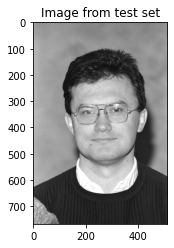

In [46]:
#test_image = test_image.astype(float)
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Image from test set')# change category name accordingly
#plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.imshow(test_image)
plt.show()

In [47]:
predicted_image, label = predict(test_image)

In [48]:
print(type(label))
print (label)

<class 'str'>
36


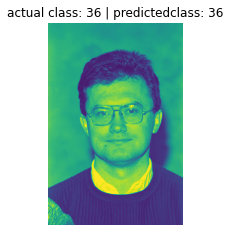

In [49]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + test_labels[2] + ' | ' + 'predictedclass: ' + label)
plt.axis("off")
#imgplot = plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
imgplot = plt.imshow(predicted_image)
plt.show()